# Homework 6: A Systematic Homework on Randomness

Physics 177, Spring 2017 (Prof. Tanedo)  
(Problem 1b Revised May 23)  
Revised: Monday, May 15th  
Due: Tuesday, May 23    

Henry Casarez


## Problem 1: Drunkard's Walk in One Dimension
This problem is motivated by Chapter 7 of *Computational Physics, Second Edition* by N. Giordano and H. Nakanishi.


*Insert your favorite joke about the Thursday night wine and music events.*

The drunkard's walk problem is an example of a **stochastic** system (randomness plays a key role). A drunkard walks randomly in one dimension, as defined by the following rule:

* At each time step, the drunkard randomly picks a direction (forward or backward) and takes one step in that direction.

In this problem, will use Python's `random` library to code the drunkard's walk in an array. You then relate this problem to diffusion in a physical system.

### Problem 1a

Code the drunkard's walk for `nSteps=1000` steps. Assume the drunkard starts at the original The result of your code should be an array of positions. It is also useful to keep an array of squared positions, $x^2$. 

Plot the drunkard's walk ($x$ as a function of step number) and the squared displacement ($x^2$ as a function of step number) for a given random seed.

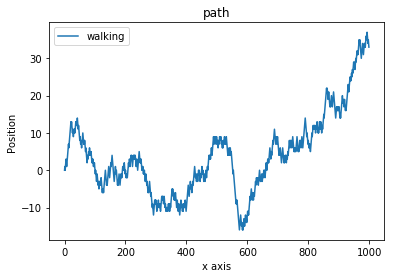

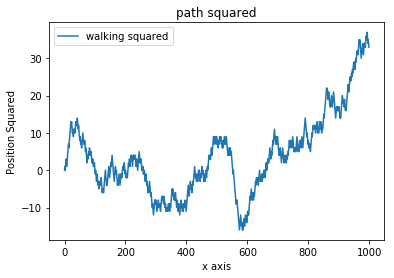

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from random import random
from random import randint

drunkwalk = [0]
step=0
nstep= 1000
a1=0
a2=0

while step < nstep - 1:
    a= randint(0,1)
    if a == 0:
        drunkwalk.append(drunkwalk[a2] - 1)
    if a== 1:
        drunkwalk.append(drunkwalk[a2] + 1)
    step = step +1
    a2 += 1
    
tpoints=np.arange(0,1000,1)
tt=np.array(tpoints)

graph = np.array(drunkwalk)

grap2= graph**2

plt.plot(tt, graph, label='walking')
plt.title("path")
plt.xlabel('x axis')
plt.ylabel('Position')
plt.legend()
plt.show()

plt.plot(tt, graph, label='walking squared')
plt.title("path squared")
plt.xlabel('x axis')
plt.ylabel('Position Squared')
plt.legend()
plt.show()






### Problem 1b (revised Tuesday, May 23)

**This question has been revised for clarity.**

A useful quantity is the *average* of $x^2$ over all previous steps in the drunkard's walk. Call this $\langle x^2 \rangle_i$. For example, for the fifth step,  

$\langle x^2 \rangle_5 = \frac{1}{5}\left(x_1^2 + x_2^2 + x_3^2 + x_4^2 + x_5^2\right)$.  

However, an even *more* useful quantity is the average of $\langle x^2 \rangle_i$ over an ensemble of many drunkards. For example, if we had three drunkards (Alice, Bob, and Charlie), then this quantity, $\langle \langle x^2 \rangle_i \rangle$, is

$\langle \langle x^2 \rangle_i \rangle = \frac{1}{3}\left( \langle x^2 \rangle_i^A + \langle x^2 \rangle_i^B + \langle x^2 \rangle_i^C \right)$.  

For our purposes, pick `nWalkers=100`. This means that you will simulate `nWalkers` different random walks. The "average of $\langle x^2\rangle$ over walkers" gives an array of length `nSteps` where each element is an average of $\langle x^2 \rangle_i$ over the `nWalker` drunkards. 

Your code should output:  

$\langle \langle x^2 \rangle_i\rangle = \frac{1}{n_\text{Walkers}} \sum_{a} \langle x^2\rangle_i^a$  ,
where $a$ runs over the different drunkards.

The resulting plot as a function of step number should look much better behaved. In fact, it should fit to

$\langle \langle x^2 \rangle_i\rangle = 2 D t_i$,

where $D$ is the diffusion constant. That is: this plot should be linear in step number. What is the value of $D$ based on your plot?

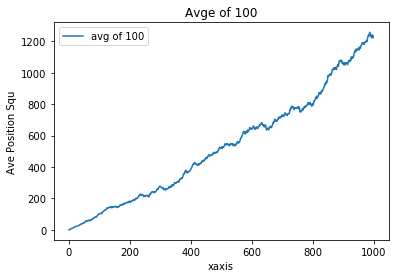

In [25]:
nwalkers=100
nsteps=1000
step=0
b2=0
path2=[0]
i=0
total_displacement= np.zeros(1000)
rint = 0
while i < nwalkers - 1:

    b2=0
    step=0
    path2 = [0]
    while step < nsteps-1: 
        rint = randint(0,1)
        if rint ==0:
            path2.append(path2[b2]-1)
        if rint == 1:
            path2.append(path2[b2]+1)
        step+=1
        b2+=1
    graph2= np.array(path2)
    graph_displacement_squ = graph2**2
    
    
    total_displacement += graph_displacement_squ
    i += 1
    
avg_displacement = total_displacement/ nwalkers

plt.plot(tt,avg_displacement, label= "avg of 100")
plt.title("Avge of 100")
plt.xlabel("xaxis")
plt.ylabel("Ave Position Squ")
plt.legend()
plt.show()

In [ ]:
My diffusuion constant is the slope so my diffusion constant would be 1.2

### Problem 1c

Do the same thing for a drunkard's walk in three dimensions. Define the position of the particle to be a `numpy` array with three components. It may be helpful to define `numpy` arrays with the possible directions one can traverse.

Store these directions in a list, `directions`.  A random step then corresponds to a shift by `sample(directions,1)[0]`. (Test this.)

What is the value of $D$ for the 3D drunkard's walk?

<IPython.core.display.Javascript object>


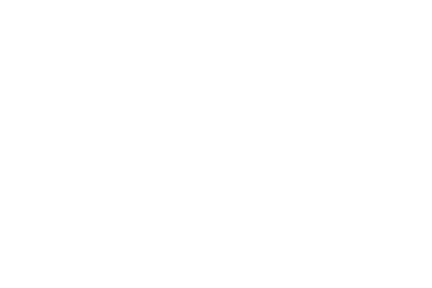

<IPython.core.display.Javascript object>


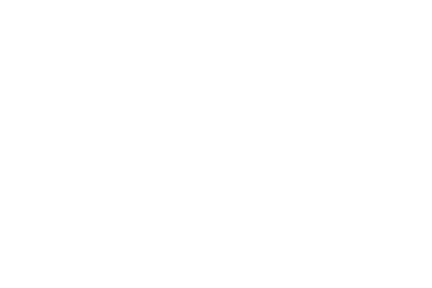

In [80]:
from random import *
import numpy as np
import matplotlib.pyplot as plt

nsteps = 1000
nwalkers = 1000
N = 0
a = np.zeros(nwalkers)
xposition = [0]
yposition = [0]
zposition = [0]

for i in range (1,nwalkers):
    xposition = [0]
    for N in range (0,nsteps - 1):

        step = randint(0,5)
        if (step == 0):
            step = 1
            xposition.append(step + xposition[N])
            yposition.append(yposition[N])
            zposition.append(zposition[N])
        elif (step == 1):
            step = -1
            xposition.append(step + xposition[N])
            yposition.append(yposition[N])
            zposition.append(zposition[N])
        elif (step == 2):
            step = 1
            xposition.append(xposition[N])
            yposition.append(step + yposition[N])
            zposition.append(zposition[N])
        elif (step == 3):
            step = -1
            xposition.append(xposition[N])
            yposition.append(step + yposition[N])
            zposition.append(zposition[N])    
        elif (step == 4):
            step = 1
            xposition.append(xposition[N])
            yposition.append(yposition[N])
            zposition.append(step + zposition[N])
        elif (step == 5):
            step = -1    
            xposition.append(xposition[N])
            yposition.append(yposition[N])
            zposition.append(step + zposition[N])

            
x = np.array(xposition)
a += x**2
xx = a/nwalkers
y = np.array(yposition)
z = np.array(zposition)
xx = x**2 / nWalkers
yy = y**2 / nwalkers
zz = z**2 / nwalkers
time = [0]
tpoints = np.arange(0,nsteps,1)
tt = np.array(tpoints)

plt.plot(tt,xx, label = '3d walking')
plt.title("3D walk")
plt.xlabel('TIME')
plt.ylabel('y axis')
plt.legend()
plt.show()



## my computer is too dumb to display so idk what happens^^

### Problem 1.x (extra credit)

*This problem has no programming, I suggest working it out on paper and then sketching the proof here, with key steps written out explicitly*

Derive the diffusion equation from the discretized drunkard's walk. For simplicity, work in two dimensions. Let $P(i,j,t)$ be the probability of finding the drunkard at site $(i,j)$ and time $t$. You want to show:

$\displaystyle \frac{\partial P(x,y,t)}{\partial t} = D \nabla^2 P(x,y,t)$

The key to this is the insight that the probability that the drunkard is at position $(i,j)$ at time $t$ is given by the equally weighted average of the probabilities that the drunkard was at one of the adjacent positions. 

Use this insight to re-write $P(i,j,t) - P(i,j,t-1)$ as a sum of terms that reproduces the Laplacian. You remember what the discretized Laplacian looks like, right?

## Problem 2: Brownian Motion

Let's use the 2D drunkard's walk to model Brownian motion. 

### Problem 2a

Imagine a 2D box of length `L=101`. Place a "drunkard" in the middle of the grid. The drunkard moves in one step in any direction (north, east, south, west) each step. If the drunk hits the wall, forbit motion that goes outside of the box. 

Animate the position of the drunkard as a funtion of time for some period of time.

### Problem 2b

Same as problem 2a, but now populate the center of the box with 20 drunkards that each move randomly. For this problem, allow the drunkards to "stack" on top of each other if they overlap.

### Problem 2x (extra credit)

Semi-self-avoiding drunkards. Same as problem 2b, but now prohibit any motion that would cause drunkards to overlap with each other. You'll have to come up with some appropriate initial condition where the drunkards all start close to each other in the center of the box. There may be conditions where a drunkard cannot move.

## 2a I don't know how to animate so this question scarred me. this question was like whaaaaat. I didn't get it. In case Flip was wondering. YES THIS WAS TOO HARD.


In [71]:
from matplotlib import animation, rc
from IPython.display import HTML

x_xis = [51]
y_axis = [51]
nSteps = 1000
step = 0
count = 0
b = 0

## 2b

## Problem 3: Hyperspheres and Monte Carlo

Calculate the volume of a unit $n$-sphere for the cases $n$ = 2,3,4,5,6. Use the **Monte Carlo** "throwing marbles" method where you randomly sample points in an $n$-dimensional unit cube and keep track of how many points fall within the condition

$\sum_i^n x_i^2 < 1$.

Compare to the analytic formulae here: https://en.wikipedia.org/wiki/Volume_of_an_n-ball

### Problem 3x

Plot the estimated hypervolume as a function of number of random samples used, and plot (as a horizontal line) the correct values from the analytic formula. Alternatively, plot the "difference from the true result" as a function of number of samples. 

Comment on how the number of samples required depends on the dimensionality of the hypersphere.

In [59]:
def V2(nSample):
    number = 0
    for i in range(nSample):
        x = random()
        y = random()
        if x**2 + y**2 < 1:
            number += 1 
   
    return 4*number/nSample
N = 10000 
for i in range(10):
    print(V2(N))

3.138
3.1524
3.1436
3.1284
3.14
3.1512
3.1132
3.1484
3.1512
3.1336


In [66]:
def V3(nSample):
    number = 0
    for i in range(nSample):
        x = random()
        y = random()
        z = random()
        if x**2 + y**2 + z**2 < 1:
            number += 1 
   
    return (2**3)*number/nSample
N = 10000 
for i in range(10):
    print(V3(N))

4.1656
4.2136
4.1632
4.26
4.1784
4.1288
4.1224
4.1848
4.1144
4.2632


In [63]:
def V4(nSample):
    number = 0
    for i in range(nSample):
        
        x = random()
        y = random()
        z = random()
        a = random()
        if x**2 + y**2 + z**2 + a** 2 < 1:
            number += 1 
   
    return (2**4)*number/nSample
N = 10000 
for i in range(10):
    print(V4(N))

4.8224
4.9504
4.9552
4.9376
4.9152
4.9216
4.8256
4.8384
4.8944
4.8912


In [64]:
def V5(nSample):
    number = 0
    for i in range(nSample):
        x = random()
        y = random()
        z = random()
        a = random()
        b = random()
        if x**2 + y**2 + z**2 + a** 2 + b**2 < 1:
            number += 1 
   
    return (2**5)*number/nSample
N = 10000 
for i in range(10):
    print(V5(N))

5.3312
5.3984
5.2832
5.376
5.264
5.3024
5.3536
5.2352
5.3216
4.9632


In [65]:
def V6(nSample):
    number = 0
    for i in range(nSample):
        x = random()
        y = random()
        z = random()
        a = random()
        b = random()
        c = random()
        if x**2 + y**2 + z**2 + a** 2 + b**2 + c**2 < 1:
            number += 1 
   
    return (2**6)*number/nSample
N = 10000 
for i in range(10):
    print(V6(N))

5.0368
5.216
5.3248
5.1328
5.152
5.0112
5.0048
5.152
5.024
5.0048


In [49]:
from math import pi as pi
R=1
once=0
final=1
value = 0
while once < final:
        rint = randint(2,6)
        if rint == 2:
            volume= pi*R**2
        if rint == 3:
            volume = (4*pi/3)*R**3
        if rint ==4:
            volume = (pi**2/2)*R**4
        if rint == 5:
            ((8*pi**2)/15)*R**5
        if rint == 6:
            (pi**3/6)*R**6
        once += 1
print(volume)

4.934802200544679


## Idk what I was doing here^^^ Also I didnt know exactly what to plot. Like how do you plot a volume. I dont know man this hw was weird aggghh!! please dont take off to many points!